In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuration ---
ANALYSIS_FOLDER = 'statistical_analysis'
VISUALIZATION_FOLDER = 'visualizations' # Folder to save plots

# Define the path to the input file
summary_csv_path = os.path.join(ANALYSIS_FOLDER, 'statistical_summary.csv')

# Create the output folder if it doesn't exist
os.makedirs(VISUALIZATION_FOLDER, exist_ok=True)

# Set plotting style for publication quality
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

print(f"Reading summary data from: '{summary_csv_path}'")


Reading summary data from: 'statistical_analysis/statistical_summary.csv'


In [2]:
try:
    df_summary = pd.read_csv(summary_csv_path)
    print("✅ Successfully loaded the statistical summary data.")

    # Create a dedicated 'architecture' column for easier plotting
    df_summary['architecture'] = df_summary['arch_type'] + '_' + df_summary['model_name'].str.split('_').str[-1]

    display(df_summary.head())
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{summary_csv_path}'.")
    print("Please run the 'analysis.ipynb' notebook first to generate this file.")

✅ Successfully loaded the statistical summary data.


,dataset_size,model_name,arch_type,n_params,val_loss_mean,val_loss_std,train_loss_mean,train_loss_std,gen_gap_mean,gen_gap_std,training_time_mean,training_time_std,architecture
0,400,gru_micro,gru,6582993,10.435173,0.192486,10.487455,0.020701,-0.052282,0.189808,1.066920,0.083106,gru_micro
1,400,gru_nano,gru,3279377,10.702211,0.082433,10.710784,0.018990,-0.008573,0.065711,0.941317,0.013385,gru_nano
2,400,lstm_micro,lstm,6616273,10.616153,0.085293,10.671145,0.025650,-0.054992,0.087814,1.024124,0.011790,lstm_micro
3,400,lstm_nano,lstm,3283601,10.760715,0.029740,10.762294,0.005620,-0.001579,0.027997,0.940713,0.035470,lstm_nano
4,400,mlp_micro,mlp,6499793,10.707250,0.065135,10.726447,0.016862,-0.019196,0.060843,0.863518,0.022959,mlp_micro


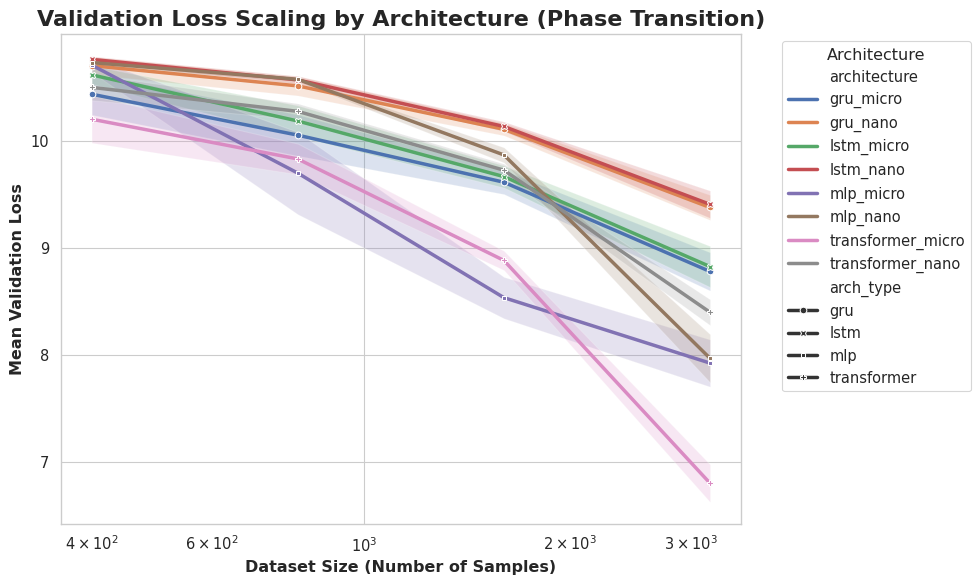

✅ Plot saved to 'visualizations/validation_loss_scaling.png'


In [3]:
if 'df_summary' in locals():
    plt.figure(figsize=(10, 6))

    # Plot the mean validation loss for each architecture
    plot = sns.lineplot(
        data=df_summary,
        x='dataset_size',
        y='val_loss_mean',
        hue='architecture',
        style='arch_type',
        markers=True,
        dashes=False,
        linewidth=2.5
    )

    # Add the shaded error band for standard deviation
    for name, group in df_summary.groupby('architecture'):
        plt.fill_between(
            group['dataset_size'],
            group['val_loss_mean'] - group['val_loss_std'],
            group['val_loss_mean'] + group['val_loss_std'],
            alpha=0.2
        )

    plot.set_title('Validation Loss Scaling by Architecture (Phase Transition)', fontsize=16, weight='bold')
    plot.set_xlabel('Dataset Size (Number of Samples)', weight='bold')
    plot.set_ylabel('Mean Validation Loss', weight='bold')
    plot.set_xscale('log') # Log scale is crucial for scaling law plots
    plt.legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the figure
    output_path = os.path.join(VISUALIZATION_FOLDER, 'validation_loss_scaling.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    plt.show()
    print(f"✅ Plot saved to '{output_path}'")


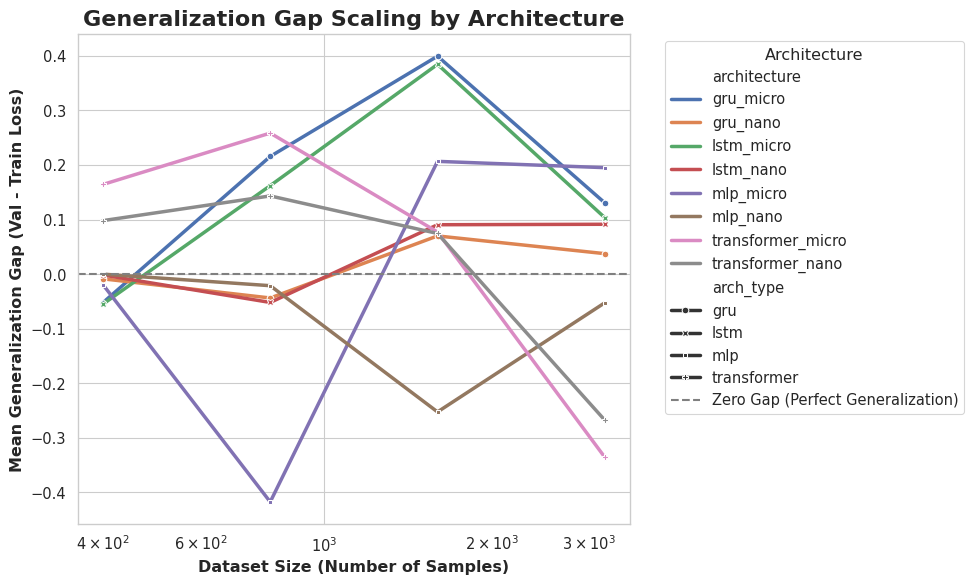

✅ Plot saved to 'visualizations/gen_gap_scaling.png'


In [4]:
if 'df_summary' in locals():
    plt.figure(figsize=(10, 6))

    plot = sns.lineplot(
        data=df_summary,
        x='dataset_size',
        y='gen_gap_mean',
        hue='architecture',
        style='arch_type',
        markers=True,
        dashes=False,
        linewidth=2.5
    )

    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='grey', linestyle='--', linewidth=1.5, label='Zero Gap (Perfect Generalization)')

    plot.set_title('Generalization Gap Scaling by Architecture', fontsize=16, weight='bold')
    plot.set_xlabel('Dataset Size (Number of Samples)', weight='bold')
    plot.set_ylabel('Mean Generalization Gap (Val - Train Loss)', weight='bold')
    plot.set_xscale('log')
    plt.legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the figure
    output_path = os.path.join(VISUALIZATION_FOLDER, 'gen_gap_scaling.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    plt.show()
    print(f"✅ Plot saved to '{output_path}'")
